In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()


# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table - measurement table
Measurement=Base.classes.measurement

In [9]:
# Save references to each table - Station table
Station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Climate Analysis

In [11]:
# 1 Design a query to retrieve the last 12 months of precipitation data and plot the results

# 2 Calculate the date 1 year ago from the last data point in the database

# 3 Perform a query to retrieve the data and precipitation scores

# 4 Save the query results as a Pandas DataFrame and set the index to the date column

# 5 Sort the dataframe by date

# 6 Use Pandas Plotting with Matplotlib to plot the data


In [12]:
# 1 Design a query to retrieve the last 12 months of precipitation data and plot the results

#Find the most latest date in the data set
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
# 2 Calculate the date 1 year ago from the last data point in the database
query_months=dt.date(2017,8,23)-dt.timedelta(days=365)
print(query_months)

2016-08-23


In [14]:
# 3 Perform a query to retrieve the data and precipitation scores
result=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# 4 Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(result,columns=["date","precipitation"])
prcp_df

#4 Set the index as the date column 
prcp_df.set_index('date', inplace = True)
prcp_df.head()


,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [17]:
# 5 Sort the dataframe by date
prcp_df=prcp_df.sort_values(by="date")
prcp_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


<function matplotlib.pyplot.show(*args, **kw)>

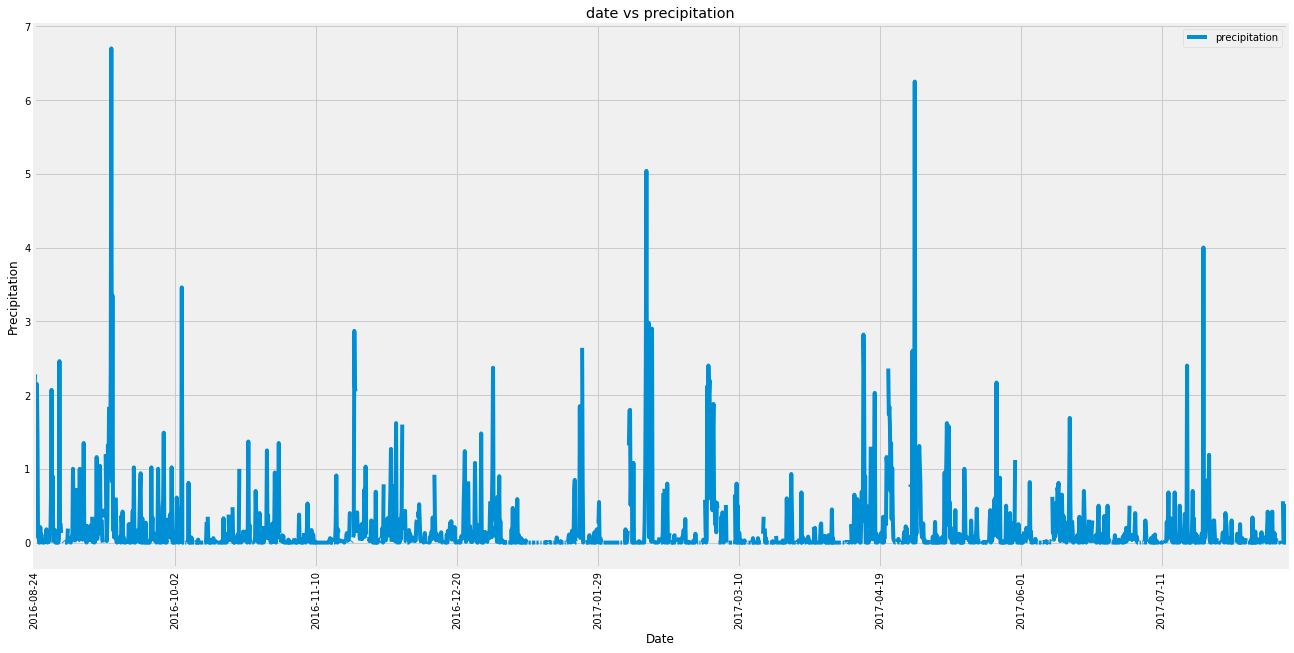

In [18]:

#6 Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20,10))
prcp_df.plot(ax = ax, x_compat = True)

# format plot
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title("date vs precipitation")
plt.xticks(rotation='vertical')


# save plot
plt.savefig("Images/precipitation.png")

# display plot
plt.show

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station? #USC00519281, 2772

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station=="USC00519281").all()
    



[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

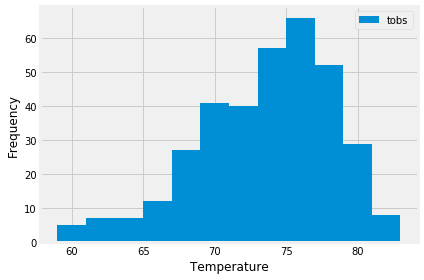

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results_last12=session.query(Measurement.tobs).\
    filter(Measurement.station =="USC00519281").\
     filter(Measurement.date >'2016-08-23').all()

# Plot the results as a histogram
station_high = pd.DataFrame(results_last12, columns=['tobs'])
station_high.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.savefig("Images/station-histogram.png")
plt.tight_layout()
plt.show

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_temps=calc_temps('2017-02-06','2017-02-16')
print(trip_temp)

print(f"Lowest Temperature: {trip_temps[0][0]} Fahrenheit, Average Temperature: {round(trip_temps[0][1], 2)} Fahrenheit, Highest Temperature: {trip_temps[0][2]} Fahrenheit")

[(59.0, 70.41891891891892, 80.0)]
Lowest Temperature: 59.0 Fahrenheit, Average Temperature: 70.42 Fahrenheit, Highest Temperature: 80.0 Fahrenheit


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
def daily_normals(date):
    
     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

daily_normals("01-01")

# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 5)

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
